In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)

Generating traces: 100%|██████████| 1000/1000 [06:12<00:00,  2.68it/s]


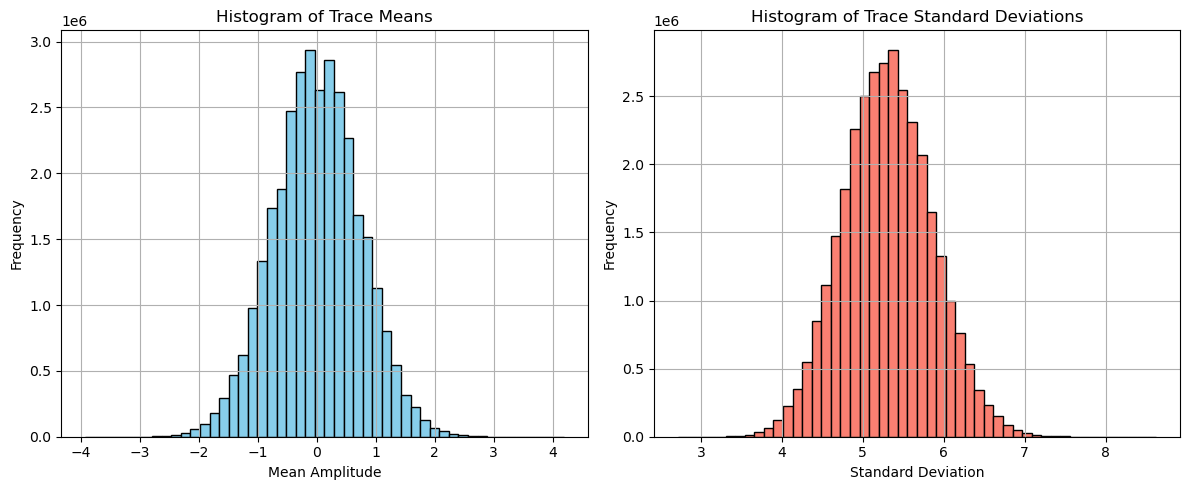

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

energy = 0
n_sets = 10
means = []
stds = []

for _ in tqdm(range(n_sets), desc="Generating traces"):
    trace_batch = ts.generate(
        E=energy,
        x=-40, y=80, z=-1800,
        no_noise=False,
        type_recoil='NR',
        quantize=True,
        phonon_only=False
    )  # shape (54, 32768)

    trace_batch = np.asarray(trace_batch, dtype=np.float16)

    # Compute mean and std for each of the 54 traces in this batch
    batch_means = np.mean(trace_batch, axis=1)  # shape (54,)
    batch_stds = np.std(trace_batch, axis=1)    # shape (54,)

    means.append(batch_means)
    stds.append(batch_stds)

# Convert to arrays: shape (1000, 54)
means = np.stack(means, axis=0)
stds = np.stack(stds, axis=0)

# Plot histograms of flattened data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(means.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Trace Means")
plt.xlabel("Mean Amplitude")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(stds.flatten(), bins=50, color='salmon', edgecolor='black')
plt.title("Histogram of Trace Standard Deviations")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
from tools import *
energy = 100
n_sets = 100
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"

# Load traces
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

In [19]:
loaded_traces.shape

(100, 54, 32768)

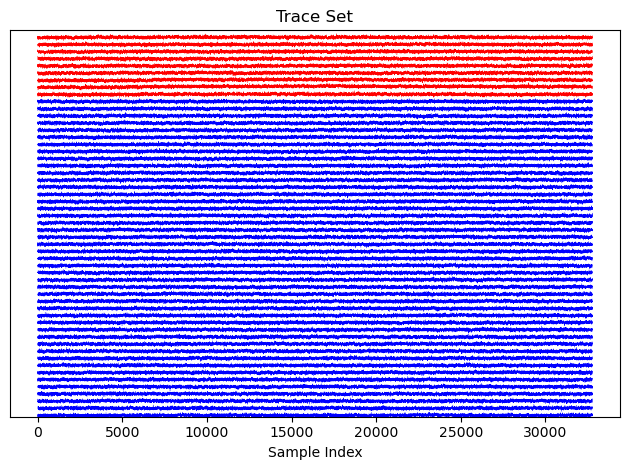

In [22]:
plot_trace_set(loaded_traces[5])

In [16]:
np.std(loaded_traces[6][0])

0.09424